In [55]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# Loading Dataset

In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
full_data=pd.concat([train_data,test_data])
full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Data Analysis

In [3]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [65]:
#Missing values

In [4]:
train_data['Title'] = train_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
full_data['Title'] = full_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [5]:
newtitles={
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "Jonkheer":   "Royalty",
    "Lady" :      "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mr" :        "Mr",
    "Mme":        "Mrs",
    "Ms":         "Mrs",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Mlle":       "Miss",
    "Master" :    "Master",
    }

In [6]:
train_data['Title']=train_data.Title.map(newtitles)
full_data['Title']=full_data.Title.map(newtitles)

In [8]:
train_data.groupby(['Title','Sex']).Age.mean()

Title    Sex   
Master   male       4.574167
Miss     female    21.804054
Mr       male      32.368090
Mrs      female    35.718182
Officer  female    49.000000
         male      46.562500
Royalty  female    40.500000
         male      42.333333
Name: Age, dtype: float64

In [9]:
def newage(cols):
    title=cols[0]
    Sex=cols[1]
    Age=cols[2]
    if pd.isnull(Age):
        if title=='Master' and Sex=="male":
            return 4.57
        elif title=='Miss' and Sex=='female':
            return 21.8
        elif title=='Mr' and Sex=='male': 
            return 32.37
        elif title=='Mrs' and Sex=='female':
            return 35.72
        elif title=='Officer' and Sex=='female':
            return 49
        elif title=='Officer' and Sex=='male':
            return 46.56
        elif title=='Royalty' and Sex=='female':
            return 40.50
        else:
            return 42.33
    else:
        return Age 

In [10]:
train_data.Age=train_data[['Title','Sex','Age']].apply(newage, axis=1)
full_data.Age=full_data[['Title','Sex','Age']].apply(newage, axis=1)

In [11]:
mean=train_data['Fare'].mean()
full_data['Fare']=full_data['Fare'].fillna(mean)

In [12]:
train_data['Cabin']=train_data['Cabin'].fillna("unknown")
full_data['Cabin']=full_data['Cabin'].fillna("Unknown")

In [13]:
mode=train_data['Embarked'].mode()[0]
print(mode)
full_data['Embarked']=full_data['Embarked'].fillna(mode)

S


In [66]:
#only the null values of Survived column in testing dataset is left
full_data.isnull().sum().sum()

418

# Feature Engineering

C:\Users\Sagar\anaconda3\envs\Coding\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


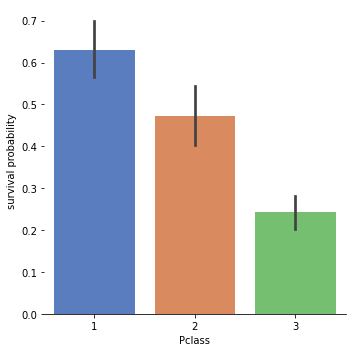

In [63]:
g = sns.factorplot(x="Pclass",y="Survived",data=train_data,kind="bar", palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64


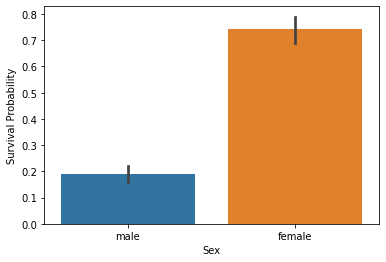

In [59]:
print(train_data.groupby(['Sex']).Survived.value_counts())
g = sns.barplot(x="Sex",y="Survived",data=train_data)
g = g.set_ylabel("Survival Probability")

In [15]:
full_data['Sex']=full_data['Sex'].map({'male':0,'female':1}).astype('int64')

C:\Users\Sagar\anaconda3\envs\Coding\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Sagar\anaconda3\envs\Coding\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


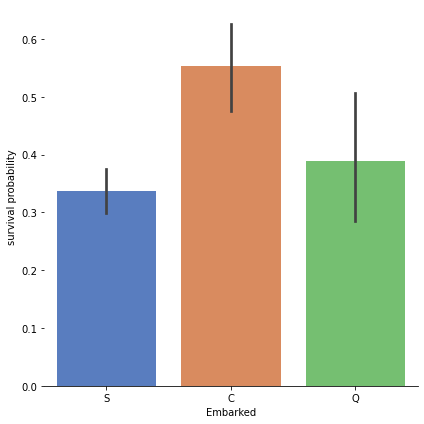

In [68]:
g = sns.factorplot(x="Embarked", y="Survived",  data=train_data,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

In [16]:
print(train_data.groupby(['Embarked']).Survived.value_counts())

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64


In [17]:
full_data['Embarked']=full_data['Embarked'].map({'S':1,'Q':2,'C':3}).astype('int64')

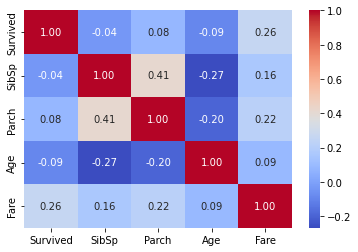

In [70]:
g = sns.heatmap(train_data[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [19]:
full_data['FamilySize']=full_data['SibSp']+full_data['Parch']+1

In [20]:
full_data.Cabin = full_data.Cabin.map(lambda x: x[0])

In [21]:
full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.00,1,0,A/5 21171,7.2500,U,1,Mr,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00,1,0,PC 17599,71.2833,C,3,Mrs,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.00,0,0,STON/O2. 3101282,7.9250,U,1,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00,1,0,113803,53.1000,C,1,Mrs,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.00,0,0,373450,8.0500,U,1,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,32.37,0,0,A.5. 3236,8.0500,U,1,Mr,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.00,0,0,PC 17758,108.9000,C,3,Royalty,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.50,0,0,SOTON/O.Q. 3101262,7.2500,U,1,Mr,1
416,1308,NaN,3,"Ware, Mr. Frederick",0,32.37,0,0,359309,8.0500,U,1,Mr,1


In [22]:
full_data=pd.get_dummies(full_data, columns=['Pclass','Embarked','Title','Cabin'], drop_first=True)

In [23]:
full_data=full_data.drop(['PassengerId','Name','Ticket'],axis=1)

In [24]:
corr=full_data.corr()
corr.Survived.sort_values(ascending=False)

Survived         1.000000
Sex              0.543351
Title_Mrs        0.344935
Title_Miss       0.332795
Fare             0.257307
Cabin_B          0.175095
Embarked_3       0.168240
Cabin_D          0.150716
Cabin_E          0.145321
Cabin_C          0.114652
Pclass_2         0.093349
Parch            0.081629
Cabin_F          0.057935
Title_Royalty    0.033391
FamilySize       0.016639
Cabin_G          0.016040
Embarked_2       0.003650
Cabin_T         -0.026456
Title_Officer   -0.031316
SibSp           -0.035322
Age             -0.089621
Cabin_U         -0.316912
Pclass_3        -0.322308
Title_Mr        -0.549199
Name: Survived, dtype: float64

In [25]:
cols= ['Age', 'SibSp', 'Parch', 'Fare']
full_data[cols]=full_data[cols].clip(lower=full_data[cols].quantile(0.15), upper=full_data[cols].quantile(0.85),axis=1)

In [26]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [27]:
features=['Age','Fare','SibSp']
full_data[features]=ss.fit_transform(full_data[features])

In [28]:
X=full_data[:891]
test=full_data[891:]
y=X['Survived']
X=X.drop(['Survived'],axis=1)
test=test.drop(['Survived'],axis=1)

In [29]:
print(X.shape,y.shape)


(891, 23) (891,)


# Modelling

In [31]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=1)
print(X_train.shape,y_train.shape)

(712, 23) (712,)


In [53]:
logistic=make_pipeline(StandardScaler(),LogisticRegression())
logistic.fit(X_train,y_train)
y_pred=logistic.predict(X_valid)
print(accuracy_score(y_pred,y_valid))

0.8212290502793296


In [45]:
forest=RandomForestClassifier(n_estimators=400,max_depth=8, max_features=4,
                                    random_state=0)
#param=[{'n_estimators':[100,200,300,400,500],'max_depth':[2,4,6,8,10],
#                     'max_features':['auto', 'sqrt', 'log2']}]
#GSRF=GridSearchCV(estimator=forest, param_grid=param, scoring='accuracy',cv=5)
#scores_rf=cross_val_score(GSRF,X,y,scoring='accuracy',cv=5)
#GSRF.best_params_
forest.fit(X_train,y_train)
forest_score = cross_val_score(forest, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
print(forest_score)

0.841431924882629
0.776536312849162


In [51]:
svc=make_pipeline(StandardScaler(),SVC(C = 10, gamma = 'auto' ,kernel = 'rbf', random_state = 0))
# param_grid = [{'gamma': ['scale','auto'], 
#               'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#               'C': [0.001 ,0.01 ,0.1, 1, 10, 100]}]

#grid_search = GridSearchCV(svc, param_grid=param_grid, cv = 10)
#grid_search.fit(X_train, y_train)
#grid_search.best_params_

# best params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
svc.fit(X_train,y_train)
svc_score = cross_val_score(svc, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
print(svc_score)
y_pred=svc.predict(X_valid)
print(accuracy_score(y_pred,y_valid))

0.8371870109546166
0.7597765363128491


In [49]:
grdb_clf = GradientBoostingClassifier(max_depth=4, max_features= 2, n_estimators= 200)
#param= [{'n_estimators':[100,200,300],  'max_depth': [2, 4, 8, 16, 20], 
#               'max_features': [2, 4, 6, 8, 10]}]

#grid_search = GridSearchCV(grdb_clf, param_grid=param, cv = 10)
#grid_search.fit(X, y)
#grid_search.best_params_

#best param : {'max_depth': 4, 'max_features': 2, 'n_estimators': 200}
grdb_clf.fit(X, y)

grdb_clf_score = cross_val_score(grdb_clf, X, y, cv = 10, scoring = 'accuracy').mean()

print("Gradient Boosting score: ", grdb_clf_score)
print(grdb_clf.score(X, y))

Gradient Boosting score:  0.8271910112359551
0.9079685746352413


In [80]:
model=GSRF.fit(X,y)

In [54]:
y_test=model.predict(test)
y_test

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [55]:
y_test=y_test.astype('int64')
y_test=pd.DataFrame(y_test)
y_test.to_csv('t2_sub.csv')